# Columns
'Divorce_date',<br>
'DOB_partner_man',<br>
'DOB_partner_woman',<br>
'Date_of_marriage'


In [42]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date as d
from dateutil.relativedelta import relativedelta as rd
import seaborn as sn
import matplotlib.pyplot as plt

In [43]:
D=d(2021,7,13)
print('D',D,type(D))

print(pd.to_datetime(D))

D 2021-07-13 <class 'datetime.date'>
2021-07-13 00:00:00


# READ the data

In [44]:


df = pd.read_csv('divorces_2000-2015_translated.csv'
                    ,header=0
                    ,usecols=[0,3,16,29]              # usecols with numbers 
                    ,names=['dod','man','wom','dom']  # and names will re-names columns
                    ,parse_dates=[0,1,2,3]  # parse_dates is list of col to make dates.
                 )
# drop any rows with NaN
df = df.dropna()
df.head(3)
# notice row 2 is wrong century

,dod,man,wom,dom
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26
2,2005-01-02,2055-02-22,2047-03-21,1975-12-18
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14


In [45]:
# make temp columns to calc correct century
df['man_yr']  =pd.to_datetime(df['man']).dt.year
df['man_mo'] =pd.to_datetime(df['man']).dt.month
df['man_da']   =pd.to_datetime(df['man']).dt.day

df['wom_yr']  =pd.to_datetime(df['wom']).dt.year
df['wom_mo'] =pd.to_datetime(df['wom']).dt.month
df['wom_da']   =pd.to_datetime(df['wom']).dt.day

df['mar_yr']  =pd.to_datetime(df['dom']).dt.year
df['mar_mo'] =pd.to_datetime(df['dom']).dt.month
df['mar_da']   =pd.to_datetime(df['dom']).dt.day

df['div_yr']  =pd.to_datetime(df['dod']).dt.year
df['div_mo'] =pd.to_datetime(df['dod']).dt.month
df['div_da']   =pd.to_datetime(df['dod']).dt.day


df.head(3)

,dod,man,wom,dom,man_yr,man_mo,man_da,wom_yr,wom_mo,wom_da,mar_yr,mar_mo,mar_da,div_yr,div_mo,div_da
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,1975,12,18,1983,8,1,2000,6,26,2006,9,6
2,2005-01-02,2055-02-22,2047-03-21,1975-12-18,2055,2,22,2047,3,21,1975,12,18,2005,1,2
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,1975,10,30,1978,10,13,1998,11,14,2006,1,2


In [46]:
# calc century based on this year (2021) : hardcoded 
df['man_yr']= df['man_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df['wom_yr']= df['wom_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df['mar_yr']= df['mar_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df['div_yr']= df['div_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df.head(3)

,dod,man,wom,dom,man_yr,man_mo,man_da,wom_yr,wom_mo,wom_da,mar_yr,mar_mo,mar_da,div_yr,div_mo,div_da
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,1975,12,18,1983,8,1,2000,6,26,2006,9,6
2,2005-01-02,2055-02-22,2047-03-21,1975-12-18,1955,2,22,1947,3,21,1975,12,18,2005,1,2
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,1975,10,30,1978,10,13,1998,11,14,2006,1,2


In [47]:
# re-assign birthdates ,mar,div based on corrected centuries:
df['man']=df.apply( lambda x: d( x.man_yr,x.man_mo,x.man_da ) ,axis=1)
df['wom']=df.apply( lambda x: d( x.wom_yr,x.wom_mo,x.wom_da ) ,axis=1)
df['dom']=df.apply( lambda x: d( x.mar_yr,x.mar_mo,x.mar_da ) ,axis=1)
df['dod']=df.apply( lambda x: d( x.div_yr,x.div_mo,x.div_da ) ,axis=1)

# drop temp columns
df.drop([ 'man_yr','man_mo','man_da'
         ,'wom_yr','wom_mo','wom_da'
         ,'mar_yr','mar_mo','mar_da'
         ,'div_yr','div_mo','div_da'
        ]
        , axis = 1
        , inplace = True)
print('DF final')
df.head(3)

DF final


,dod,man,wom,dom
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14


# DATA CLEANED

In [48]:
# df_dob=df.copy('deep')
df.head(3)

,dod,man,wom,dom
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14


In [49]:
# calc age_dif, age_man age_woman
df['age_dif'] = df.apply( lambda x: 
                            round(  (  rd( x['wom'], x['man']).years*12 
                                     + rd( x['wom'], x['man']).months  
                                     )/12
                                  )
                         ,axis = 1)
df['abs_dif'] = df.apply( lambda x: 
                            abs( x['age_dif'] )
                         ,axis = 1)

df['mar_len'] = df.apply( lambda x: 
                            round(  (  rd( x['dod'], x['dom']).years*12 
                                     + rd( x['dod'], x['dom']).months  
                                     )/12
                                  )
                         ,axis = 1)


df['age_man'] = df.apply( lambda x: 
                            round(  (  rd( x['dom'], x['man']).years*12 
                                     + rd( x['dom'], x['man']).months  
                                     )/12
                                  )
                         ,axis = 1)

df['age_wom'] = df.apply( lambda x: 
                            round(  (  rd( x['dom'], x['wom']).years*12 
                                     + rd( x['dom'], x['wom']).months  
                                     )/12
                                  )
                         ,axis = 1)
              

df['age_min'] = df.apply( lambda x: min( x['age_man'],x['age_wom'] )
                        ,axis = 1)

df['age_max'] = df.apply( lambda x: 
                            max( x['age_man'],x['age_wom'] )
                         ,axis = 1)

df['pct_up'] = df.apply( lambda x: 
                          round( x['abs_dif']/x['age_min'] *100)
                         ,axis = 1)

df['pct_dn'] = df.apply( lambda x: 
                          round( x['abs_dif']/x['age_max'] *100)
                         ,axis = 1)

df.head(3)

,dod,man,wom,dom,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,8,8,6,24,17,17,24,47,33
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18,-8,8,29,21,29,21,29,38,28
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,3,3,7,23,20,20,23,15,13


In [50]:
df[df['age_wom']<0]

,dod,man,wom,dom,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
462,2001-04-01,1943-03-06,1954-05-01,1931-08-31,11,11,70,-12,-23,-23,-12,-48,-92
1799,2004-12-02,1944-12-06,1997-02-01,1967-10-16,52,52,37,23,-29,-29,23,-179,226


In [51]:
df.drop( [462,1799]
           , axis = 0, inplace = True)

In [52]:
# df[ df['age_man']<15]

In [53]:
# df[ df['age_wom']<15 ]

# Charts

Text(41.875, 0.5, 'count')

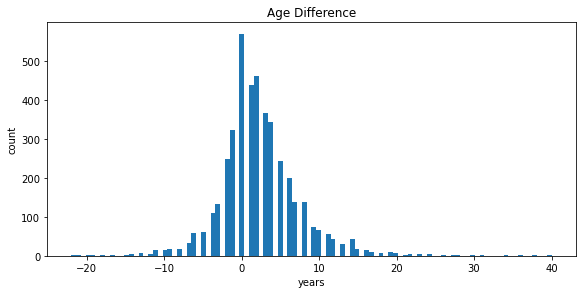

In [139]:
fig , ax = plt.subplots(figsize=(8,4))
ax.set_title('Age Difference')
ax.hist(df['age_dif'],bins = 100);
# plt.show()
fig.tight_layout();
ax.set_xlabel('years')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

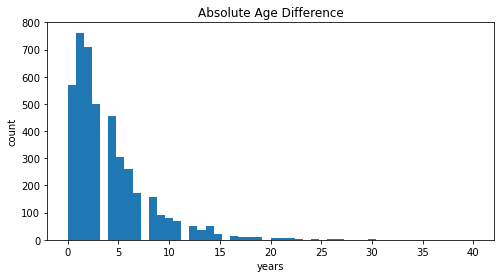

In [143]:
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df['abs_dif'],bins =50)
ax.set_title('Absolute Age Difference')
ax.set_xlabel('years')
ax.set_ylabel('count')

(0.0, 15.0)

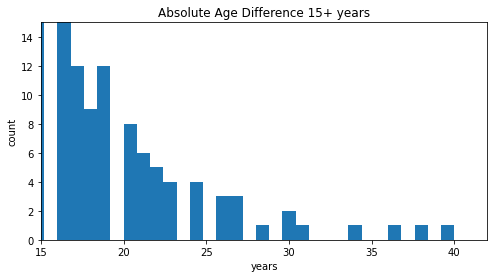

In [150]:
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df['abs_dif'],bins =50)
ax.set_title('Absolute Age Difference 15+ years')
ax.set_xlabel('years')
ax.set_ylabel('count')
ax.set_xlim(left=15)
ax.set_ylim(top=15)

Text(0, 0.5, 'count')

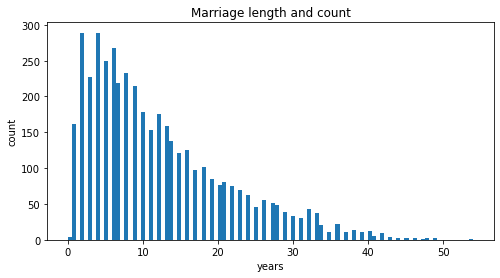

In [151]:
fig , ax = plt.subplots(figsize=(8,4))
ax.hist(df['mar_len'],bins =100);
ax.set_title('Marriage length and count')
ax.set_xlabel('years')
ax.set_ylabel('count')

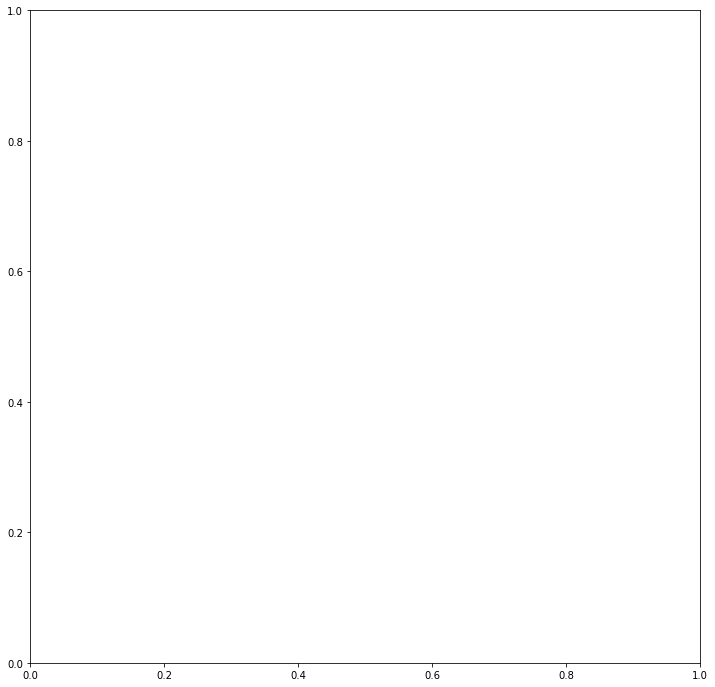

In [155]:
fig,ax = plt.subplots(figsize=(12,12))
# snheat = sn.heatmap(df.corr(),annot=True)
# plt.show(snheat)
# df.corr()

In [58]:

# ( df.loc[ : , ['abs_dif','mar_len'] ] )

,abs_dif,mar_len
0,8,6
2,8,29
4,3,7
5,3,11
6,0,15
...,...,...
4918,1,4
4919,1,1
4920,2,36
4921,6,34


In [59]:
# df[ ['abs_dif','mar_len'] ]

,abs_dif,mar_len
0,8,6
2,8,29
4,3,7
5,3,11
6,0,15
...,...,...
4918,1,4
4919,1,1
4920,2,36
4921,6,34


In [60]:
# df.head(3)

,dod,man,wom,dom,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,8,8,6,24,17,17,24,47,33
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18,-8,8,29,21,29,21,29,38,28
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,3,3,7,23,20,20,23,15,13


# Age Comparison man v. woman

Text(0, 0.5, 'age of woman')

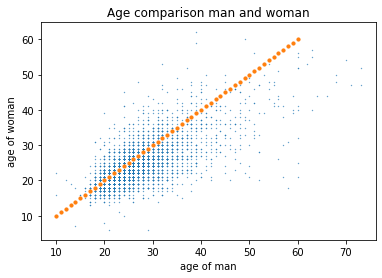

In [80]:
fig , ax = plt.subplots()
ax.scatter( df['age_man'],df['age_wom'],s=.1)
# ax.line([10,10],[60,60])
ax.scatter( list(range(10,61)),list(range(10,61)),s=10)

ax.set_title('Age comparison man and woman')
ax.set_xlabel('age of man')
ax.set_ylabel('age of woman')


In [181]:
len(df[ df['age_man']>df['age_wom'] ]) / len(df)

0.6351784080512352

In [ ]:
len(df[ df['wom']>df['wom'] ]) 

In [178]:
len(df)

4372

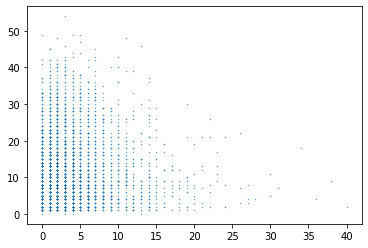

In [62]:
fig , ax = plt.subplots()
ax.scatter( df['abs_dif'],df['mar_len'],s=.1)

# ax.line([10,10],[60,60])
# make box charts for each age delta

# Marriage Length shown by age difference

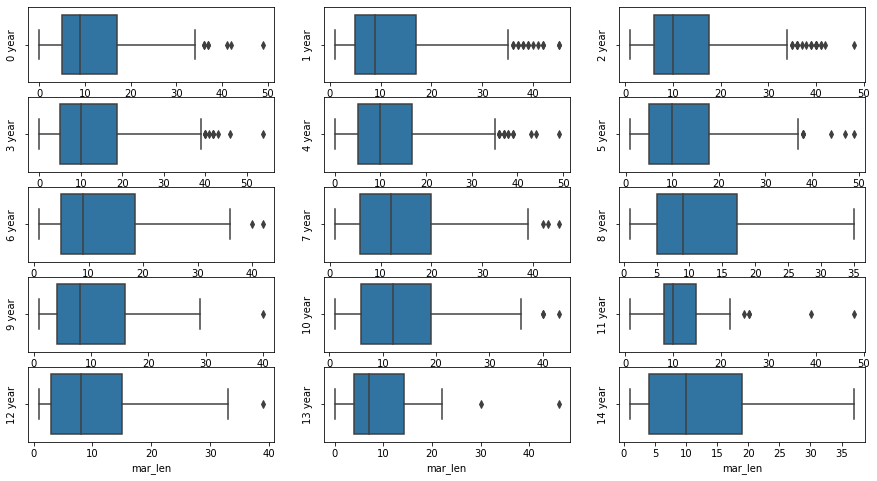

In [176]:
fig , ax = plt.subplots(5,3,figsize=(15,8))  #5,3,figsize=(18,6)
ax=ax.flatten()
ml_lst = [ df[df['abs_dif']==i]['mar_len'] for i in range(16) ]

for i in range(15):
    
    ax[i].set_ylabel(f'{i} year')
    sbn.boxplot(x=ml_lst[i],ax=ax[i])
     




# 75% percentile up / down is 24/19; 
# close to 25/20 Hypothesis

In [63]:
df.describe()

,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,2.329140,3.959058,12.225755,27.221866,24.870311,24.039113,28.053065,17.400274,13.065645
std,5.212777,4.113569,9.267772,6.939830,6.168300,5.566147,7.066467,19.622119,10.968270
min,-22.000000,0.000000,0.000000,10.000000,6.000000,6.000000,14.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,23.000000,21.000000,20.000000,23.000000,5.000000,5.000000
50%,2.000000,3.000000,10.000000,26.000000,24.000000,23.000000,27.000000,12.000000,11.000000
75%,5.000000,5.000000,17.000000,30.000000,28.000000,26.000000,31.000000,24.000000,19.000000
max,40.000000,40.000000,54.000000,73.000000,62.000000,57.000000,73.000000,383.000000,79.000000


In [64]:
# df[ df['abs_dif']>5].describe()

,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,6.616246,9.607843,11.931839,32.476190,25.852474,24.363212,33.965453,42.098973,28.191410
std,8.238914,4.392995,9.109717,8.844511,8.153475,6.853590,8.575869,24.482981,8.911494
min,-22.000000,6.000000,0.000000,10.000000,6.000000,6.000000,14.000000,12.000000,11.000000
25%,6.000000,7.000000,5.000000,27.000000,20.000000,20.000000,28.000000,29.000000,22.000000
50%,8.000000,8.000000,9.000000,31.000000,24.000000,23.000000,32.000000,36.000000,26.000000
75%,11.000000,11.000000,17.000000,36.000000,30.000000,27.000000,38.000000,49.000000,33.000000
max,40.000000,40.000000,48.000000,73.000000,62.000000,55.000000,73.000000,383.000000,79.000000


In [77]:
# df['age_dif'].mean(),df['age_dif'].std()

In [66]:
df['abs_dif'].mean(),df['abs_dif'].std()

(3.959057639524245, 4.113569381719339)

In [67]:
df['mar_len'].mean(),df['mar_len'].std()

(12.225754803293688, 9.267772071996777)

In [68]:
df['pct_up'].mean(),df['pct_up'].std()

(17.400274473924977, 19.622119471720953)

In [69]:
df['pct_dn'].mean(),df['pct_dn'].std()

(13.065645013723696, 10.968269785672646)

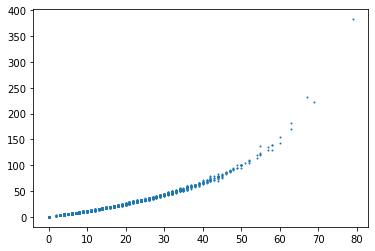

In [70]:
fig , ax = plt.subplots()
ax.scatter( df['pct_dn'],df['pct_up'],s=1)
# ax.line([10,10],[60,60])
# ax.scatter( list(range(10,61)),list(range(10,61)),s=10)


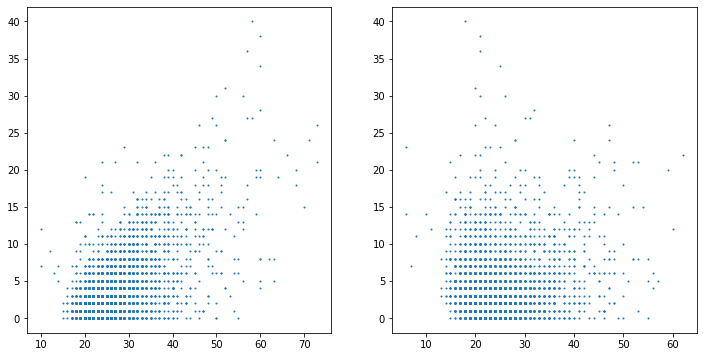

In [71]:

fig , ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter( df['age_man'],df['abs_dif'],s=1)
ax[1].scatter( df['age_wom'],df['abs_dif'],s=1)
# ax.line([10,10],[60,60])
# ax.scatter( list(range(10,61)),list(range(10,61)),s=10)